# Load data

In [31]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom python")
from silvhua import *

sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\midterm-2022-10-24\src")
from midterm_functions import *
from supervised import *
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'train_Jan1-7_scaled_2022-10-30_0834.csv'
train_scaled = load_csv2(path, filename, column1_as_index=False)

path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'test_scaled_2022-10-30_0834.csv'
test_scaled = load_csv2(path, filename, column1_as_index=False)

In [21]:
# Load unscaled training data
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I\data'
filename = 'train_for_model_2022-10-29_1606.csv'
train_unscaled = load_csv2(path, filename, column1_as_index=False)

In [11]:
columns_for_ID =[
'fl_date',
 'mkt_carrier',
 'mkt_carrier_fl_num','origin_airport_id', 'dest_airport_id']
train_scaled = train_scaled.set_index(columns_for_ID)
test_scaled = test_scaled.set_index(columns_for_ID)

In [12]:
X_train = train_scaled.drop(columns='arr_delay')
y = train_scaled['arr_delay']

In [22]:
y_raw = train_unscaled['arr_delay']
delay_std = y_raw.std()
delay_std

24.767966334675222

In [14]:
# Create list with the columns to be scaled.
numeric_cols = [
    # 'crs_elapsed_time', 'distance', 'mean_payload_per_departure',
    #    'mean_seats_per_departure', 'mean_passengers_per_departure',
    #    'mean_freight_per_departure', 'mean_mail_per_departure',
    #    'mean_empty_seats_per_departure', 'mean_dep_delay_carrier_origin_month',
    #    'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_date_t-1_year_month',
       'mean_arr_delay_carrier_origin_date_t-1_year_month'
]

# Look at data distribution

In [47]:
test_scaled.shape

(451070, 38)

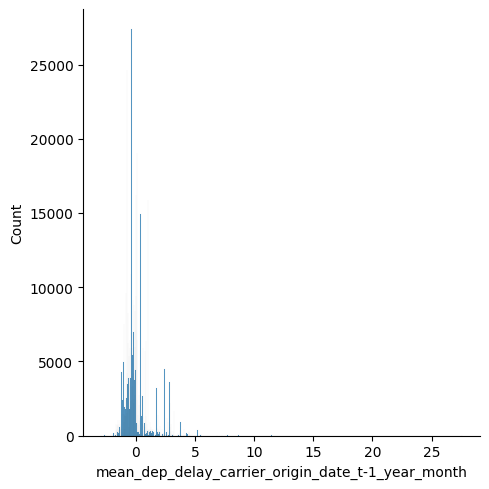

In [34]:
# scaled test data
sns.displot(data=test_scaled,x='mean_dep_delay_carrier_origin_date_t-1_year_month')

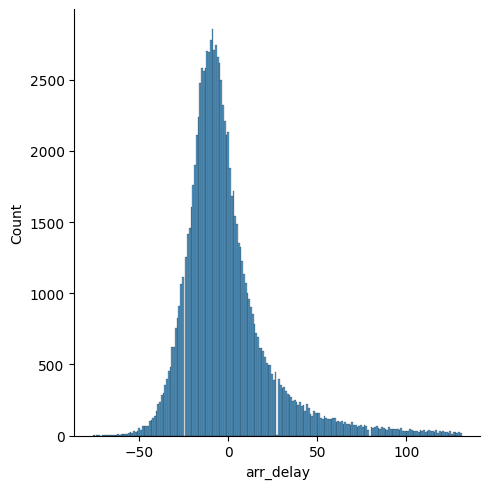

In [33]:
# Unscaled arr_delay from training data
sns.displot(data=train_unscaled,x='arr_delay')

# Linear regression

In [48]:
from sklearn.linear_model import LinearRegression
from supervised import *
from sklearn.model_selection import train_test_split
param_lr = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()
lr_attributes = supervised(X_train, y, lr, param_lr, model_name='linear regression')
best_lr = lr_attributes.get_best_model(scaled=False)

**Data not scaled**


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(



linear regression evaluation metrics: 
	Test data	Training data		Difference
RMSE: 		0.96		0.94		0.02
MAE: 		0.67		0.67		-0.00
R^2: 		0.06		0.06		-0.00
Best model parameters from randomized search: {'fit_intercept': True}


In [49]:
best_lr.predict(test_scaled)

array([-2.84271680e+10, -2.84271680e+10, -2.84271680e+10, ...,
        1.19819093e+09, -4.20343379e+10, -4.20343379e+10])

In [50]:
best_lr.coef_

array([ 3.06808131e-02,  9.87975331e-02,  3.49387384e-02, -3.38135360e-02,
        4.76397053e-01,  1.82023890e-01,  4.34945241e-01,  6.42338577e-01,
        1.01090169e+11,  1.01090169e+11,  1.01090169e+11,  1.01090169e+11,
        1.36017569e+11,  1.36017569e+11,  1.36017569e+11,  1.36017569e+11,
        4.60643352e+11,  4.60643352e+11,  4.60643352e+11,  4.60643352e+11,
        4.60643352e+11,  4.60643352e+11,  4.60643352e+11,  6.12300083e+11,
        6.12300083e+11,  6.12300083e+11, -7.31333600e-01,  6.37367986e-01,
       -7.81306604e-02,  7.38693892e+12, -9.00512179e+12,  4.40945610e-02,
        5.27345436e-03, -6.06153953e+12,  1.81391057e+12,  1.61072264e+13,
       -1.81391057e+12, -1.61072264e+13])

In [51]:
model_name =  'linear' # model name here
column_name = 'predicted_delay_'+model_name
results = pd.DataFrame(best_lr.predict(test_scaled) * delay_std,columns=[column_name], 
    index=test_scaled.index)
results

predicted_delay_linear
fl_date    mkt_carrier mkt_carrier_fl_num origin_airport_id dest_airport_id                        
2020-01-01 WN          4598               13891             14831                     -7.040831e+11
                       4761               13891             14831                     -7.040831e+11
                       5162               13891             14831                     -7.040831e+11
                       5684               13891             14831                     -7.040831e+11
                       6152               13891             14831                     -7.040831e+11
...                                                                                             ...
2020-01-31 DL          4948               10721             14492                     -2.212981e+12
                       4950               10397             15323                     -1.176923e+12
                       4954               11193             11278                      2.967675e+10
                                          11278             11193                     -1.041105e+12
                       4955               11278             11193                     -1.041105e+12

[451070 rows x 1 columns]

(array([   256.,    924.,   1597.,   4837.,  41673., 150058., 197510.,
         49537.,   3677.,   1001.]),
 array([-6.13439380e+12, -5.12240672e+12, -4.11041965e+12, -3.09843257e+12,
        -2.08644550e+12, -1.07445842e+12, -6.24713441e+10,  9.49515731e+11,
         1.96150281e+12,  2.97348988e+12,  3.98547696e+12]),
 <BarContainer object of 10 artists>)

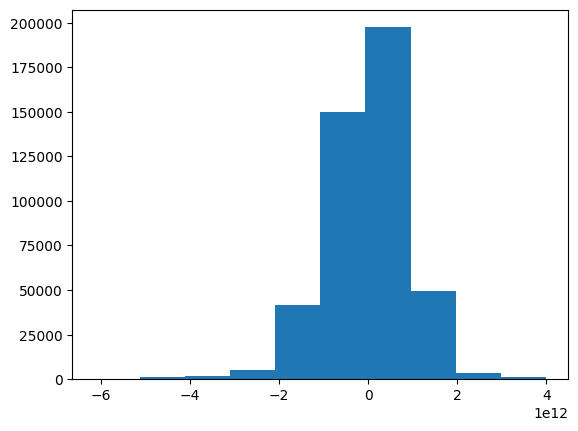

In [52]:
plt.hist(results['predicted_delay_linear'])

In [ ]:
# Save the model
import pickle
model = best_lr

filename = 'Silvia_best_lr.sav'
pickle.dump(model, open(filename, 'wb',append_version=True))

loaded_best_lr = pickle.load(open(filename, 'rb'))
loaded_best_lr.coef_

array([ 3.06808131e-02,  8.13724117e-02,  3.58999122e-02,  8.99436219e-03,
        1.04020192e-02, -1.25192369e-01,  2.95987885e-02,  1.97252785e-01,
        1.56691570e+11,  1.56691570e+11,  1.56691570e+11,  1.56691570e+11,
        7.45859915e+10,  7.45859915e+10,  7.45859915e+10,  7.45859915e+10,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  5.16555806e+11,
        5.16555806e+11,  5.16555806e+11,  5.16555806e+11,  8.57969776e+10,
        8.57969776e+10,  8.57969776e+10, -5.40817438e-01,  4.50619340e-01,
       -9.69567319e-03,  6.33574895e+12, -7.72365814e+12,  1.21678426e-02,
       -2.27831104e-04, -5.19895902e+12, -2.18757345e+12, -2.02076015e+13,
        2.18757345e+12,  2.02076015e+13])

In [53]:
best_lr.predict(X_train) * delay_std

array([  8.84051923,  -0.30234334,  -3.30158926, ..., -10.19501739,
        14.40363667,  -2.61829332])

<AxesSubplot: xlabel='arr_delay'>

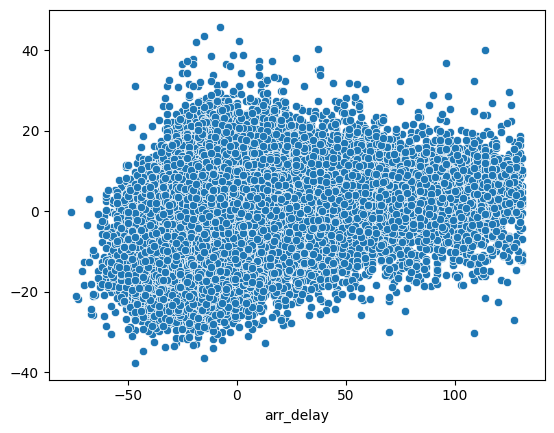

In [54]:
# Actual vs. predicted delay in training data
sns.scatterplot(x= y_raw, y=best_lr.predict(X_train)*delay_std)

# Save CSV

In [37]:
save_csv(results, 'model_predictions_',
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\mid-term-project-I',
append_version=True)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/mid-term-project-I/model_predictions_2022-10-30_0935


# *End of Page*